<a href="https://colab.research.google.com/github/popelucha/STEAM/blob/main/STEAM_korpus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk #the Natural Language Toolkit
import matplotlib.pyplot as plt #For graphics
import wordcloud #Makes word clouds
import numpy as np #For KL divergence
from nltk.corpus import multext_east #Orwell's 1984
import pprint #pretty print
import random

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook
%matplotlib inline

Nápověda ke korpusu (MULTEXT-East) MTE: https://www.nltk.org/api/nltk.corpus.reader.mte.html

In [ ]:
nltk.download('mte_teip5')

[nltk_data] Downloading package mte_teip5 to /root/nltk_data...
[nltk_data]   Unzipping corpora/mte_teip5.zip.


True

In [ ]:
words = multext_east.words("oana-cs.xml")
print(words[:20])

['Byl', 'jasný', ',', 'studený', 'dubnový', 'den', 'a', 'hodiny', 'odbíjely', 'třináctou', '.', 'Winston', 'Smith', ',', 's', 'bradou', 'přitisknutou', 'k', 'hrudi', ',']


In [ ]:
tagged_words =  multext_east.tagged_words("oana-cs.xml", tagset='universal')
pprint.pprint(tagged_words[:20])

[('Byl', 'VERB'),
 ('jasný', 'ADJ'),
 (',', ''),
 ('studený', 'ADJ'),
 ('dubnový', 'ADJ'),
 ('den', 'NOUN'),
 ('a', 'CONJ'),
 ('hodiny', 'NOUN'),
 ('odbíjely', 'VERB'),
 ('třináctou', 'NUM'),
 ('.', ''),
 ('Winston', 'NOUN'),
 ('Smith', 'NOUN'),
 (',', ''),
 ('s', 'ADP'),
 ('bradou', 'NOUN'),
 ('přitisknutou', 'ADJ'),
 ('k', 'ADP'),
 ('hrudi', 'NOUN'),
 (',', '')]


In [ ]:
tagged_words =  multext_east.tagged_words("oana-cs.xml", tagset='msd')
pprint.pprint(tagged_words[:20])

[('Byl', '#Vcps-sman----n'),
 ('jasný', '#Afpmsn---c'),
 (',', ''),
 ('studený', '#Afpmsn---c'),
 ('dubnový', '#Afpmsn---c'),
 ('den', '#Ncmsn'),
 ('a', '#Cc'),
 ('hodiny', '#Ncfpn'),
 ('odbíjely', '#Vmps-pfan----n'),
 ('třináctou', '#Mofsal--f'),
 ('.', ''),
 ('Winston', '#Npmsn'),
 ('Smith', '#Npmsn'),
 (',', ''),
 ('s', '#Spsi'),
 ('bradou', '#Ncfsi'),
 ('přitisknutou', '#Afpfsi---c'),
 ('k', '#Spsd'),
 ('hrudi', '#Ncfsd'),
 (',', '')]


In [ ]:
tagged_sentences = multext_east.tagged_sents("oana-cs.xml", tagset='universal')
pprint.pprint(tagged_sentences[0])

[('Byl', 'VERB'),
 ('jasný', 'ADJ'),
 (',', ''),
 ('studený', 'ADJ'),
 ('dubnový', 'ADJ'),
 ('den', 'NOUN'),
 ('a', 'CONJ'),
 ('hodiny', 'NOUN'),
 ('odbíjely', 'VERB'),
 ('třináctou', 'NUM'),
 ('.', '')]


In [ ]:
tagged_paras = multext_east.tagged_paras("oana-cs.xml", tagset='universal')
pprint.pprint(tagged_paras[0])

[[('Byl', 'VERB'),
  ('jasný', 'ADJ'),
  (',', ''),
  ('studený', 'ADJ'),
  ('dubnový', 'ADJ'),
  ('den', 'NOUN'),
  ('a', 'CONJ'),
  ('hodiny', 'NOUN'),
  ('odbíjely', 'VERB'),
  ('třináctou', 'NUM'),
  ('.', '')],
 [('Winston', 'NOUN'),
  ('Smith', 'NOUN'),
  (',', ''),
  ('s', 'ADP'),
  ('bradou', 'NOUN'),
  ('přitisknutou', 'ADJ'),
  ('k', 'ADP'),
  ('hrudi', 'NOUN'),
  (',', ''),
  ('aby', 'CONJ'),
  ('unikl', 'VERB'),
  ('protivnému', 'ADJ'),
  ('větru', 'NOUN'),
  (',', ''),
  ('rychle', 'ADV'),
  ('proklouzl', 'VERB'),
  ('skleněnými', 'ADJ'),
  ('dveřmi', 'NOUN'),
  ('věžáku', 'NOUN'),
  ('na', 'ADP'),
  ('Sídlišti', 'NOUN'),
  ('vítězství', 'NOUN'),
  (',', ''),
  ('ne', 'PRT'),
  ('však', 'CONJ'),
  ('dost', 'ADV'),
  ('rychle', 'ADV'),
  (',', ''),
  ('aby', 'CONJ'),
  ('zabránil', 'VERB'),
  ('zvířenému', 'ADJ'),
  ('písku', 'NOUN'),
  ('a', 'CONJ'),
  ('prachu', 'NOUN'),
  ('vniknout', 'VERB'),
  ('dovnitř', 'ADV'),
  ('.', '')]]


In [ ]:
lemma_paras = multext_east.lemma_paras("oana-cs.xml")
pprint.pprint(lemma_paras[0])

[[('Byl', 'být'),
  ('jasný', 'jasný'),
  (',', ''),
  ('studený', 'studený'),
  ('dubnový', 'dubnový'),
  ('den', 'den'),
  ('a', 'a'),
  ('hodiny', 'hodiny'),
  ('odbíjely', 'odbíjet'),
  ('třináctou', 'třináctý'),
  ('.', '')],
 [('Winston', 'Winston'),
  ('Smith', 'Smith'),
  (',', ''),
  ('s', 's'),
  ('bradou', 'brada'),
  ('přitisknutou', 'přitisknutý'),
  ('k', 'k'),
  ('hrudi', 'hruď'),
  (',', ''),
  ('aby', 'aby'),
  ('unikl', 'uniknout'),
  ('protivnému', 'protivný'),
  ('větru', 'vítr'),
  (',', ''),
  ('rychle', 'rychle'),
  ('proklouzl', 'proklouznout'),
  ('skleněnými', 'skleněný'),
  ('dveřmi', 'dveře'),
  ('věžáku', 'věžák'),
  ('na', 'na'),
  ('Sídlišti', 'sídliště'),
  ('vítězství', 'vítězství'),
  (',', ''),
  ('ne', 'ne'),
  ('však', 'však'),
  ('dost', 'dost'),
  ('rychle', 'rychle'),
  (',', ''),
  ('aby', 'aby'),
  ('zabránil', 'zabránit'),
  ('zvířenému', 'zvířený'),
  ('písku', 'písek'),
  ('a', 'a'),
  ('prachu', 'prach'),
  ('vniknout', 'vniknout'),
  ('dov

# Konkordance

In [ ]:
lemma_words = multext_east.lemma_words("oana-cs.xml")
lemmata = [x[1] for x in lemma_words]

In [ ]:
corpusIndex = nltk.text.ConcordanceIndex(words)

In [ ]:
corpusIndex.print_concordance('bratr')

Displaying 23 of 23 matches:
oči sledují , kam se hnete . " Velký bratr tě sleduje " , zněl nápis pod obraze
 průčelí domu hned naproti . " Velký bratr tě sleduje , " hlásal nápis a tmavé 
uctívání , zdálo se mu , že se Velký bratr tyčí do výše jako neporazitelný a ne
brazovku . Nikdo neslyšel , co Velký bratr říká . Bylo to jen pár slov povzbuze
systém myšlení , jako kdyby se Velký bratr a Strana a Ideopolicie dali smést ze
ch Strany figuroval samozřejmě Velký bratr jako vůdce a strážce Revoluce od jej
edmnáctého března napsaly , že Velký bratr ve svém projevu z minulého dne předp
í na různých verzích toho , co Velký bratr vlastně řekl . A záhy některý z vedo
nebo neschopnost . Možná že se Velký bratr jen zbavil příliš oblíbeného podříze
 jako hrdina . Stávalo se , že Velký bratr věnoval svůj Denní rozkaz oslavě pam
 vším . O takovém konci , řekl Velký bratr , se nedá uvažovat jinak než s pocit
t jinak než s pocity závisti . Velký bratr připojil ještě několik poznámek o či
ii . Na vrc

In [ ]:
corpusIndex = nltk.text.ConcordanceIndex(lemmata)

In [ ]:
corpusIndex.print_concordance('bratr')

Displaying 25 of 80 matches:
y oko sledovat  kam se hnout   velký bratr ty sledovat   znít nápis pod obraz  
 na průčelí dům hned naproti   velký bratr ty sledovat   hlásat nápis a tmavý o
trana  téměř na úroveň samotný velký bratr  potom se zaplést do kontrarevoluční
ý člověk moci uvěřit  ostouzet velký bratr  odsuzovat diktatura strana  požadov
ti Goldstein  ale naopak proti velký bratr  strana a ideopolicie  v takový okam
ový chvíle se tajný proklínání velký bratr měnit na uctívání  zdát se on  že se
na uctívání  zdát se on  že se velký bratr tyčit do výš jako porazitelný a neoh
ký postava se prolnout do tvář velký bratr  černovlasý  s černý knír  plný síla
at obrazovka  nikdo slyšet  co velký bratr říkat  být ten jen pár slovo povzbuz
n  že být vyslovit  potom tvář velký bratr zase zmizet a místo on se objevit ve
ví   nevědomost být síla  tvář velký bratr zdánlivě ještě několik vteřina na ob
úhledný velký písmeno   pryč s velký bratr    pryč s velký bratr    pryč s velk
  pryč s ve

# Korpusové počty
Slova, unikátní slova a unikátní lemmata.

In [ ]:
word_vocabulary = set([x[0] for x in lemma_words])
lemma_vocabulary = set([x[1] for x in lemma_words])

Tipněte si, kolik tokenů (slov a "neslov") má knížka 1984.

In [ ]:
print("Počet slov", len(lemma_words))

Počet slov 100366


Tipněte, kolik **unikátních** tokenů má knížka 1984.

In [ ]:
print("Počet unikátních slov", len(word_vocabulary))

Počet unikátních slov 19120


Tipněte si, kolik unikátních lemmat má knížka 1984.

In [ ]:
print("Počet unikátních lemmat", len(lemma_vocabulary))

Počet unikátních lemmat 9115


 ## Jak často se slova v knize opakují?

In [ ]:
words = [x[0] for x in lemma_words]
word_freq = nltk.FreqDist(words)

Které tokeny jsou nečastější?

In [ ]:
word_freq.most_common(20)

[(',', 8406),
 ('.', 6116),
 ('"', 4416),
 ('se', 2550),
 ('a', 2274),
 ('na', 1263),
 ('že', 1139),
 ('v', 1093),
 ('to', 1001),
 ('je', 789),
 ('si', 629),
 ('s', 580),
 ('by', 498),
 ('jako', 467),
 ('z', 460),
 ('do', 451),
 ('o', 413),
 ('ale', 394),
 ('-', 386),
 ('ho', 379)]

In [ ]:
words_lower = [x[0].lower() for x in lemma_words]
word_freq = nltk.FreqDist(words)
word_freq.most_common(20)

[(',', 8406),
 ('.', 6116),
 ('"', 4416),
 ('se', 2550),
 ('a', 2274),
 ('na', 1263),
 ('že', 1139),
 ('v', 1093),
 ('to', 1001),
 ('je', 789),
 ('si', 629),
 ('s', 580),
 ('by', 498),
 ('jako', 467),
 ('z', 460),
 ('do', 451),
 ('o', 413),
 ('ale', 394),
 ('-', 386),
 ('ho', 379)]

In [ ]:
word_freq = nltk.FreqDist(words_lower)
word_freq['zprávy'], word_freq['zpráva']

(13, 11)

In [ ]:
lemmata_lower = [x[1].lower() for x in lemma_words]
lemma_freq = nltk.FreqDist(lemmata_lower)
lemma_freq['zprávy'], lemma_freq['zpráva']

(0, 36)

## Vizualizace

(-0.5, 499.5, 499.5, -0.5)

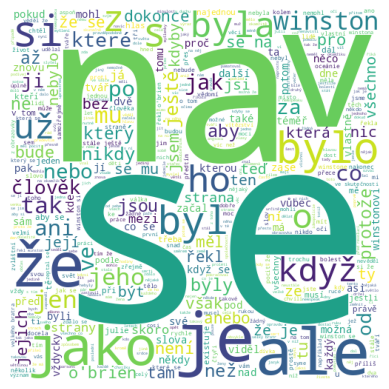

In [ ]:
wc = wordcloud.WordCloud(background_color="white", max_words=500, width= 1000, height = 1000, mode ='RGBA', scale=.5).generate(' '.join(words_lower))
plt.imshow(wc)
plt.axis("off")

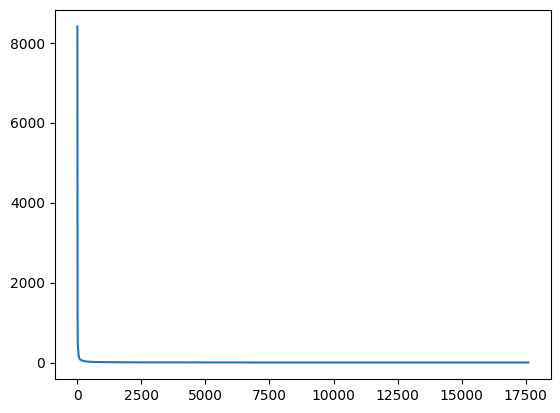

In [ ]:
#Creating a figure and axis lets us do things like change the scaling or add a title
fig = plt.figure()
plt.plot(range(len(word_freq)), sorted(word_freq.values(), reverse=True))
plt.show()

## Slova, která jsou v knize jednou
Říká se jim hapax legomena

In [ ]:
hapaxes = word_freq.hapaxes()

Tipni si, kolik procent ze všech slov jich je?

In [ ]:
print("Z celkového počtu {} slov je jich {} v textu jen jednou. To je {} procent.".format(len(word_freq), len(hapaxes), round(len(hapaxes)/len(word_freq)*100)))

Z celkového počtu 17606 slov je jich 10900 v textu jen jednou. To je 62 procent.


In [ ]:
pprint.pprint(random.sample(hapaxes, k=10))

['vázaný',
 'bzučení',
 'ústupky',
 'prázdnotu',
 'domníval',
 'pisoár',
 'averzi',
 'společenských',
 'navrchu',
 'spotřeba']


Totéž se dá spočítat pro lemmata.

In [ ]:
hapaxes = lemma_freq.hapaxes()

In [ ]:
print("Z celkového počtu {} lemmat je jich {} v textu jen jednou. To je {} procent.".format(len(lemma_freq), len(hapaxes), round(len(hapaxes)/len(lemma_freq)*100)))

# Zajímavá slova

## Dvojice slov

In [ ]:
ngrams = nltk.bigrams(words_lower)
ngram_fd = nltk.FreqDist(ngrams).most_common(20)
ngram_fd

## Nechceme nezajímavá slova


In [ ]:
!wget https://nlp.fi.muni.cz/~xpopelk/czech_stoplist.txt

--2024-11-06 16:20:46--  https://nlp.fi.muni.cz/~xpopelk/czech_stoplist.txt
Resolving nlp.fi.muni.cz (nlp.fi.muni.cz)... 147.251.51.11
Connecting to nlp.fi.muni.cz (nlp.fi.muni.cz)|147.251.51.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1815 (1.8K) [text/plain]
Saving to: ‘czech_stoplist.txt’

czech_stoplist.txt  100%[===================>]   1.77K  --.-KB/s    in 0s      

2024-11-06 16:20:47 (74.6 MB/s) - ‘czech_stoplist.txt’ saved [1815/1815]



In [ ]:
stoplist = list(".,;!?:\"'-")
with open("czech_stoplist.txt", encoding="utf-8") as f:
  stoplist.extend([x.strip() for x in f.readlines()])

In [ ]:
words_lower_stop = [w for w in words_lower if w not in stoplist]
word_freq_stop = nltk.FreqDist(words_lower_stop)
pprint.pprint(word_freq_stop.most_common(20))

[('winston', 370),
 ('řekl', 195),
 ('člověk', 188),
 ('nikdy', 159),
 ('strany', 152),
 ("o'brien", 151),
 ('měl', 143),
 ('ne', 133),
 ('není', 130),
 ('všechno', 127),
 ('dokonce', 113),
 ('však', 110),
 ('stále', 100),
 ('anebo', 99),
 ('nebylo', 98),
 ('možná', 98),
 ('tvář', 90),
 ('kdy', 89),
 ('mohl', 89),
 ('má', 85)]


(-0.5, 499.5, 499.5, -0.5)

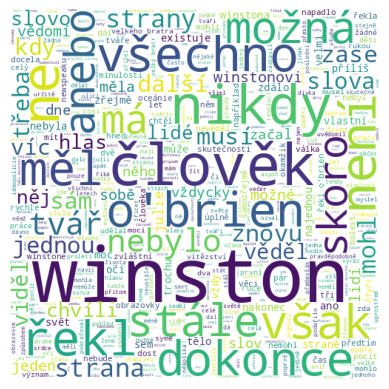

In [ ]:
wc = wordcloud.WordCloud(background_color="white", max_words=500, width= 1000, height = 1000, mode ='RGBA', scale=.5).generate(' '.join(words_lower_stop))
plt.imshow(wc)
plt.axis("off")

In [ ]:
ngrams = nltk.bigrams(words_lower_stop)
ngram_fd = nltk.FreqDist(ngrams).most_common(20)
ngram_fd

### Průběh děje
Histogram je zobrazení, které rozdělí všechna data na stejně velké přihrádky (bins) zjistí počet nějakého jevu v každé přihrádce.
V našem případě rozdělíme všechna slova (nebo lemmata, vyzkoušejte všechny varianty) na 10 přihrádek (můžete změnit) a zobrazíme celkový počet slov v přihrádce. Přidávejte slova do zkoumaného seznamu, jak je libo. Co když přidáte citově zabarvená slova? Uhádnete, jestli kniha skončí dobře nebo špatně? Co když přidáte slovo, které neexistuje?

In [ ]:
def word_histogram(words, word_list, num_bins=10):
  bin_size = int(len(words)/num_bins)
  bin_occurrences = {}
  for i in range(num_bins):
    range_low = i*bin_size
    range_high = min((i+1)*bin_size, len(words))
    for word in word_list:
      if word not in bin_occurrences:
        bin_occurrences[word] = []
      bin_occurrences[word].append(len([x for x in words[range_low:range_high] if x==word]))
  return bin_occurrences

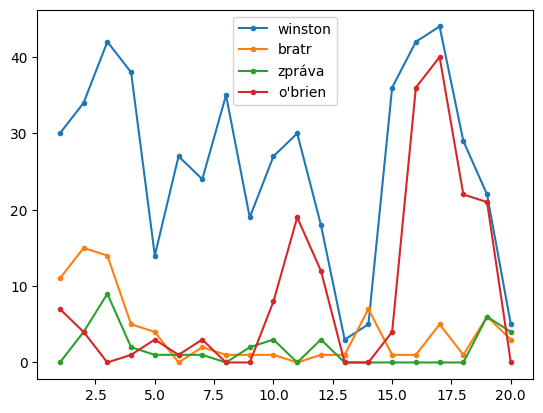

In [ ]:
#Creating a figure and axis lets us do things like change the scaling or add a title
histo = word_histogram(lemmata_lower, ["winston", "bratr", "zpráva", "o'brien"], 20)
fig = plt.figure()
for k, v in histo.items():
    plt.plot(range(1, len(v) + 1), v, '.-', label=k)
plt.legend()
plt.show()
